# Exploratory Data Analysis Project (EDA)

**Steps** 

1) Select a large real world dataset from Kaggle
2) perform data preperation and cleaning using Pandas and Numpy
3) Perform exploratory analysis and visualization using Matplotlib and Seaborn
4) Ask and answer questions about the data in a jupyter notebook
5) Document, publish and present your Jupyter notebook online

# About Dataset 

**TITLE** - US-Accidents: A Countrywide Traffic Accident Dataset - Published: January 2021

**DESCRIPTION** - This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is continuously being collected from February 2016, using several data providers, including multiple APIs that provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 1.5 million accident records in this dataset.

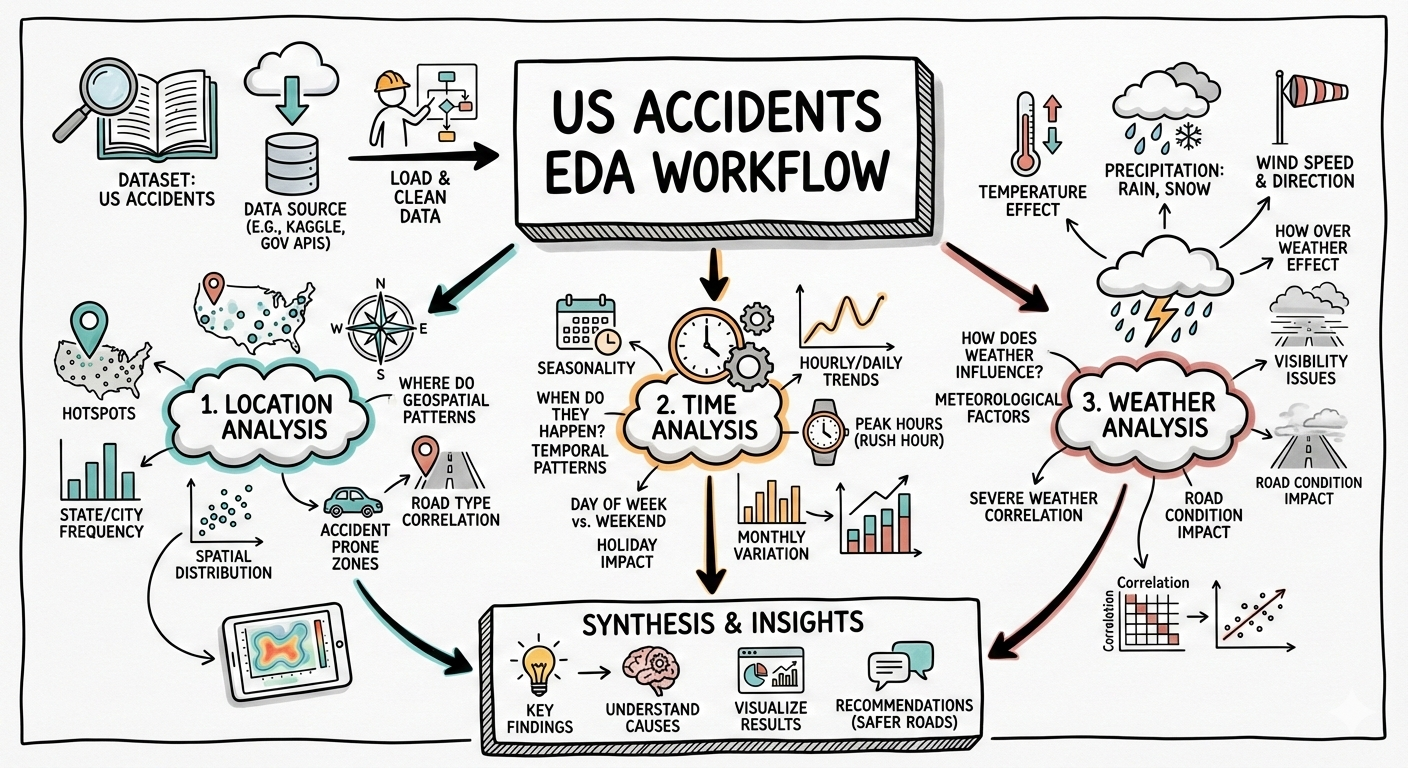

# Common Parameters & Functions

In [ ]:
global_palette="bright"
global_color='purple'

In [ ]:
def set_theme(font_scale=0.6,figsize=(5,4)):
    sns.set_style('white')
    sns.set_context('notebook',font_scale=font_scale)
    plt.rcParams['figure.figsize']=figsize
    plt.rcParams['figure.dpi']=150
    plt.rcParams['font.family']="DejaVu Sans"

def beautify_graph(
    ax,
    title="Chart Title",
    hue_title="Hue Title",
    grid_alpha=0.2,
    pad=20,
    xlabel=None,
    ylabel=None):
    
    sns.despine()

    if(ax):
        ax.set_title(title,pad=pad,size=12)
        ax.grid(alpha=grid_alpha)
        # ax.legend(loc="lower right")
        if(hue_title) and ax.get_legend():ax.get_legend().set_title(hue_title)
        ax.set_xlabel(xlabel, fontsize=8)
        ax.set_ylabel(ylabel, fontsize=8)

    return ax

## 1 Real world dataset selection

In [ ]:
!pip install --upgrade kagglehub --quiet

In [ ]:
# All imports 
import kagglehub
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(kagglehub.__version__)

# # Download latest version
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")

In [ ]:
dataset=path+"/US_Accidents_March23.csv"

## 2 Data preperation and cleaning using Pandas and Numpy

Steps

1) Look at the file using pandas
2) Visualize data and analyze columns
3) Fix any missing or incorrect data

In [ ]:
df= pd.read_csv(dataset)

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.describe()

# Insights till now

1) End_Lat,End_Lng -> it might have been optional field ( N0. of entries in Start_Lng is greater than No. of entries in End_Lat )
2) End_Lat,End_Lng -> if one value is present other was also mandatory. (both have same num of entries)
3) nd_Lat,End_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in) -> they all have missing values

In [ ]:
len(df.select_dtypes(include="number").columns)

In [ ]:
# Checking missing values
na_values=df.isna().sum().reset_index().rename(columns={'index':'Column',0:'Count_of_Na','':"Index"})
na_values=na_values[na_values['Count_of_Na']>0].assign(missing_percentage=(na_values["Count_of_Na"]/len(df))*100)
na_values=na_values.sort_values(by="Count_of_Na",ascending=False)
na_values=na_values.set_index("Column")
na_values

# Remove column that you dont want to use

1) dropping (End_Lat and End_Lng)- 44% of data is missing for End_Lat and End_Lng means this field might have been an optional field or the data was wrongly collected.
2) (Precipitation and Wind_Chill) - more than 25% data missing. Will handle these ahead.

In [ ]:
try:
  df.drop(columns=["End_Lat","End_Lng"],inplace=True)
except:
  print("Missing Values")

In [ ]:
na_values=na_values[~na_values.index.isin(["End_Lat","End_Lng"])] # Removed End_Lat and End_Lng
na_values=na_values[na_values.missing_percentage>1] # Plotting only those columns which have more than 1percent of value
na_values

# Missing values graph

In [ ]:
# Plotting these values on graph
set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
na_barplot=sns.barplot(
    data=na_values,
    x="missing_percentage",
    y="Column",
    ax=ax,
    palette=global_palette,
    hue='missing_percentage',
    )
beautify_graph(ax,xlabel="Percentage",ylabel="Fields",title="% of Missing Values",hue_title="% of Missing Values",)

# Eploratory Analysis and Visualization

In [ ]:
df.columns

**Columns that we will analyze**

1) City
2) Start_Time
3) Country
4) Severity
5) Roundabout

# 1) Cities

In [ ]:
# Cities

cities= df.City.unique()
len(cities)

In [ ]:
accidents_per_cities= df.City.value_counts()
accidents_per_cities

In [ ]:
df["City"].str.lower().eq("New York".lower()).any()

In [ ]:
len(df[df["City"]=="New York"])

In [ ]:
# Plotting these values on graph
set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.barplot(data=accidents_per_cities[:15].to_frame(),y="City",x="count",palette=global_palette,hue="count")
beautify_graph(ax,title="Cities with high accidents",hue_title="Count",xlabel="count",ylabel="Cities")

In [ ]:
accidents_per_cities

In [ ]:
set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.kdeplot(ax=ax,
            data=accidents_per_cities.to_frame(),
            x="count",
            log_scale=True,
            color=global_color)
beautify_graph(ax,title="Distribution Curve",xlabel="No. of Accidents",ylabel="Density")

Insights 

1) Most of the graph is right-skewed - which means most cities have low num of accidents and a very small num of cities have high num of accidents
2) Majority of observatons lie in low range 

In [ ]:
df.head()

In [ ]:
df.Start_Time=pd.to_datetime(df.Start_Time,format="ISO8601")

accidents_by_city_year = df.groupby(['City',df['Start_Time'].dt.year]).size().reset_index(name="Incident_count")
accidents_by_city_year=accidents_by_city_year[accidents_by_city_year["Start_Time"]<2023]
accidents_by_city_year

In [ ]:
top_cities=accidents_per_cities[:10]
top_trend=accidents_by_city_year[accidents_by_city_year["City"].isin(top_cities.index)]
top_trend.count()

In [ ]:
# Yearly trend of top 10 cities - data range - February 2016 to March 2023

# use logirithmic scale 
set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.lineplot(data=top_trend, x="Start_Time", y="Incident_count", hue="City")
beautify_graph(ax,title="Yearly accident trend (Top 10 Cities)",xlabel="Year",ylabel="No. of accidents",hue_title="City")

**Insights**

1) graph above shows that initially in the year of 2016, the number of accidents were least compared to all other values.
2) Specially in the city of Miami - the number of accidents we relatively lower till 2019 but it showed a significant increase from 2019 to 2021. When compared to other cities from top 10 cities.

In [ ]:
# use logirithmic scale 
set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.histplot(ax=ax,data=accidents_per_cities.to_frame(),x="count",log_scale=True,kde=True,color=global_color)
beautify_graph(ax,title="Distribution Curve",xlabel="No. of Accidents",ylabel="Density")

In [ ]:
low_accident_cities=accidents_per_cities[accidents_per_cities<1000]
high_accident_cities=accidents_per_cities[accidents_per_cities>=1000]

In [ ]:
(len(high_accident_cities) /len(accidents_per_cities))*100 # INSIGHT => only 8.9 percent of cities have high frequency of accidents

In [ ]:
# use logirithmic scale 
set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.histplot(low_accident_cities.to_frame(),x="count",kde=True,log_scale=True,color=global_color,ax=ax)
beautify_graph(ax,title="Distribution Curve (less than 1000 accidents)",xlabel="No. of accidents",ylabel="Density")

In [ ]:
# analyzing why and what does such a high number means at 10^0 means at a value of 1

print(f"No. of cities with only 1 accident reported {len(accidents_per_cities[accidents_per_cities==1])}")
print(f"No. of cities with only 2 accident reported {len(accidents_per_cities[accidents_per_cities==2])}")
print(f"No. of cities with only 3 accident reported {len(accidents_per_cities[accidents_per_cities==3])}")
print(f"No. of cities with only 4 accident reported {len(accidents_per_cities[accidents_per_cities==4])}")
print(f"No. of cities with only 5 accident reported {len(accidents_per_cities[accidents_per_cities==5])}")
print(f"No. of cities with only 6 accident reported {len(accidents_per_cities[accidents_per_cities==6])}")
print(f"No. of cities only with 7 accident reported {len(accidents_per_cities[accidents_per_cities==7])}")

# we see that num if decreasing very sharply from the value of 1 to 3 and then the decrease is kind of at a slower rate

In [ ]:
accidents_per_cities[accidents_per_cities==1]

In [ ]:
low_accident_cities

In [ ]:
sns.histplot(high_accident_cities.to_frame(),x="count",kde=True,log_scale=True,color=global_color).set(xlabel='City', ylabel='Density')

In [ ]:
high_accident_cities

In [ ]:
print(f"There are {len(low_accident_cities)} of cities with Low frequency")
print(f"There are {len(high_accident_cities)} of cities with High frequency")

# 2) Start Time

In [ ]:
df.Start_Time

In [ ]:
pd.to_datetime(df.Start_Time[0])

In [ ]:
df.Start_Time=pd.to_datetime(df.Start_Time,format="ISO8601")

In [ ]:
# figuring out at which hour of the day does most number of accidents happen?

df.Start_Time.dt.hour

In [ ]:
# analyze hour of day. 
set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.histplot(df.Start_Time.dt.hour,bins=24,stat="percent",color=global_color,ax=ax).set(xlabel="Hours in a day",ylabel="Percentage of accidents")
beautify_graph(ax,title="Distribution Curve (less than 1000 accidents)",xlabel="Hours in a day",ylabel="Percentage of accidents")

1) Most accident happen around 6-8 in the morning and 2-5 in the afternoon in a day.

In [ ]:
# What has been the trend for peak hours with every year.

# Yearwise percentage of accidents 
month_order=["January","February","March","April","May","June","July","August","September","October","November","December"]
monthly_accident_yearly=df.groupby([
    df.Start_Time.dt.year.rename("Start_Year"),
    df.Start_Time.dt.month_name().rename("Start_Month")]).size().to_frame().rename(columns={0: "Accidents"})
monthly_accident_yearly.reset_index(level=['Start_Month'],inplace=True)
monthly_accident_yearly["Month_Order"]= pd.Categorical(monthly_accident_yearly['Start_Month'], categories=month_order, ordered=True) #in order to maintain order or palette entries
monthly_accident_yearly = monthly_accident_yearly.sort_values(by=['Start_Year', 'Month_Order'])
monthly_accident_yearly=monthly_accident_yearly[monthly_accident_yearly.index<2023] # not including 2023 as onl 3 months data is present for 2023 year

monthly_accident_yearly

In [ ]:
# Monthly accident trend Per year - February 2016 to March 2023

set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.lineplot(data=monthly_accident_yearly, y="Accidents", x="Start_Year", hue="Start_Month",palette=global_palette)
beautify_graph(ax,title="Monthly accident trend Per year",ylabel="Accidents",xlabel="Start_Year",hue_title="Start_Month")

Insights 

1) Every month shows -increase with each year.
2) But the number of accidents dropped in the month of july and august there was a drop.

In [ ]:
# analyze day of week.
set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.histplot(df.Start_Time.dt.day_name(),bins=7,stat="percent",color=global_color)
beautify_graph(ax,title="Weekly trend of accidents",ylabel="Percentage of accidents",xlabel="Days of week")

1) Frequency of accidents drop a lot on weekends

**Question**:
1) Is the distribution of time at which accidents happen the same on weekends as on weekdays?
(This needs to be checked because fewer people might be traveling on weekends)

**Answer**:
1) Yes, the distribution varies on weekends:
    - On weekends: Most accidents happen in the afternoon
    - On weekdays: Most accidents happen around 6-8 AM and 2-5 PM


In [ ]:
# weekends=df.Start_Time[(df.Start_Time.dt.day_of_week==5) | (df.Start_Time.dt.day_of_week==6)] # 5-> Saturday , 6-> Sunday
# cleaner version of line above
weekends=df[df.Start_Time.dt.day_of_week.isin([5,6])]
len(weekends)

In [ ]:
weekends.head()

In [ ]:
# analyze day of week.
set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.histplot(weekends.Start_Time.dt.hour,bins=24,stat="percent",color=global_color)
beautify_graph(ax,title="Hourly Trend of Accidents",ylabel="Percentage of accidents",xlabel="Hours on Weekends")

In [ ]:
# month analysis

set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.histplot(weekends.Start_Time.dt.month,bins=12,stat="percent",color=global_color)
beautify_graph(ax,title="Monthly Trend of Accidents",ylabel="Percentage of accidents",xlabel="Month")

**Questions**

1) What is range of data available ? (from what month and year to what month and year)

**Answers**

1) The accident data were collected from February 2016 to March 2023

   - 2016 -> Jeb to Dec (11 months)
   - 2023 -> Jan to Mar (3 month)

In [ ]:
# yearly analysis
years_included=df[df.Start_Time.dt.year<2023]

set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.histplot(years_included.Start_Time.dt.year,bins=7,stat="percent",color=global_color)
beautify_graph(ax,title="Yearly Trend of Accidents",xlabel="Year",ylabel="Percentage of accidents")

**Questions**

1) Why is the number of accidents reported relatively lot less for year 2016 compared?

**Answers**

1) (Analyzing ahead) need to evaluate source of data point. 

In [ ]:
df.Source.unique()

There are 3 sources. (checking treands shown by all three sources yearly)

In [ ]:
source_1=df[df.Source=="Source1"]
source_2=df[df.Source=="Source2"]
source_3=df[df.Source=="Source3"]

print(f"Source 1 {len(source_1)}, Source 2 {len(source_2)}, Source 3 {len(source_3)}")

In [ ]:
#source 1

set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.histplot(source_1.Start_Time.dt.year,bins=8,stat="percent",color=global_color)
beautify_graph(ax,title="Yearly Trend of Accidents (Source 1)",xlabel="Year",ylabel="Percentage of accidents")

In [ ]:
set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.histplot(source_2.Start_Time.dt.year,bins=8,stat="percent",color=global_color)
beautify_graph(ax,title="Yearly Trend of Accidents (Source 2)",xlabel="Year",ylabel="Percentage of accidents")

In [ ]:
set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.histplot(source_3.Start_Time.dt.year,bins=8,stat="percent",color=global_color)
beautify_graph(ax,title="Yearly Trend of Accidents (Source 3)",xlabel="Year",ylabel="Percentage of accidents")

**Insight about Sources**

1) 2 of the 3 sources have missing data for year 2019. It seems data for year 2019 is either floawed or source2 and 3 were not functioniing during this year.

In [ ]:
df.Source.value_counts().plot(kind="pie",autopct="%1.1f%%")

1) Majority of data is either from source 1 or from source 2.
2) Considering to drop data from Source 2 and Source 3 as:-
   - Source 2 data seems flawed as there is no data at all for a whole year 2019
   - Source 3 has very less amount of entries and also at the same time the data seems faulty as for a complete year 2019, there was no entry of accidents.


# 3) Country

# Start_Lat, Start_Lng

In [ ]:
set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.scatterplot(x=df.Start_Lat,y=df.Start_Lng,size=0.001,color=global_color,legend=False)
beautify_graph(ax,title="Parts of country where accidents happened",xlabel="Start_Lat",ylabel="Start_Lng")

In [ ]:
import folium
from folium.plugins import HeatMap
from branca.element import Figure

In [ ]:
# Sample 1% of the dataframe for better performance
map_size = len(df)
map_df = df.sample(n=map_size)
lat_lan_list=list(zip(list(map_df.Start_Lat), list(map_df.Start_Lng)))
fig = Figure(width=600, height=400)
m = folium.Map(lat_lan_list[0], zoom_start=3) #map object created
folium.plugins.HeatMap(lat_lan_list, auto_play=True).add_to(m)
# Add markers for each sampled location
# for lat, lng in lat_lan_list:
#     folium.Marker(
#         location=[lat, lng],
#         icon=folium.Icon(color="blue")
#     ).add_to(m)

In [ ]:
folium.plugins.HeatMap(lat_lan_list, auto_play=True).add_to(m)
fig.add_child(m)

# 4) Severity

In [ ]:
severity = df.groupby(['Severity',df['Start_Time'].dt.year]).size().reset_index().rename(columns={0: "Accidents","Start_Time":"Year"})
severity=severity[severity["Year"]!=2023]

In [ ]:
pd.unique(severity["Severity"])

In [ ]:
# # Yearly severity trend Per year - February 2016 to March 2023

set_theme(font_scale=0.6,figsize=(5,4))
fig,ax=plt.subplots()
sns.lineplot(data=severity, x="Year",y="Accidents", hue="Severity",palette=global_palette)
beautify_graph(ax,title="Yearly severity trend",xlabel="Year",ylabel="Accidents",hue_title="Start_Month")

Insights

1) Severity level 2 accidents shows a rapid increase in the number of cases with each passing year

# 5) Roundabout

In [ ]:
accidents_at_roundabouts=len(df[df.Roundabout]) #number of accidents at roundabouts
accidents_at_roundabouts

In [ ]:
percent_of_accidents_on_roundabouts=(accidents_at_roundabouts/len(df))*100
percent_of_accidents_on_roundabouts

# 6) Climate

In [ ]:
df.columns

Insights 

1) Roundabouts contributed to a very less percent of accidents. Most accidents didn't happened on the roundabouts.

# Initial Insights about data

**Format**
*column name -> insight (reason)*

1) Temperature(F) -> accidents happened in both (colder and warmer locations).
2) Over 1023 cities have reported only 1 accident and over 722 cities have reported 2 accidents.

# Questions and Answers

**Questions**

1) Which states and countries have higher number of accidents per capita? (Per capita so that we can get data based on percentage based on population)
2) Does New York shows up in data and If its there then why is num of accidents lower for it when it has most num of people in USA?
3) Among top 100 cities in number of accidents, which contributes the most?
4) Which time of the day most accidents happen?
5) Which day,week,month did the most num of accidents happen?
6) what is the trend of the number of accidents year after year. ( Decreasing or Increasing)?
7) Was roundabouts a major reason for accidents?

**Answers**

1) Better analysis done above.
2) Yes New York is there in data. And the reason why it has less num of accidents is still unclear and needs more information. (seems data collection didnt happened properly or maybe traffic management in New York is much better that all other cities).
3) Miami (Better analysis above)
4) Most accident happen around 6-8 in the morning and 2-5 in the afternoon in a day.
5) Answered better above with much deeper analysis.
6) Trend is increasing
7) No it wasn't a significant reason for accidents.

# Insights 

1) Among all accidents per cities ther are only approx 9 percent of cities which have more than 1000 accidents.
2) There is an exponential decrease in the number of accidents in both low frequency cities and high frequency cities.
3) Most accident happen around 6-8 in the morning and 2-5 in the afternoon in a day.